In [1]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
NUM_WORDS = 10000

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=NUM_WORDS)

val_data = train_data[:5000]
val_labels = train_labels[:5000]

train_data = train_data[5000:]
train_labels = train_labels[5000:]

def vectorize(seqs, dim=NUM_WORDS):
    ret = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        ret[i, seq] = 1
    return ret

train_x = vectorize(train_data)
train_y = np.asarray(train_labels).astype('float32')

val_x = vectorize(val_data)
val_y = np.asarray(val_labels).astype('float32')

test_x = vectorize(test_data)
test_y = np.asarray(test_labels).astype('float32')

print("train_x.shape = {}, train_y.shape = {}".format(train_x.shape, train_y.shape))
print("val_x.shape = {}, val_y.shape = {}".format(val_x.shape, val_y.shape))
print("test_x.shape = {}, test_y.shape = {}".format(test_x.shape, test_y.shape))

train_x.shape = (20000, 10000), train_y.shape = (20000,)
val_x.shape = (5000, 10000), val_y.shape = (5000,)
test_x.shape = (25000, 10000), test_y.shape = (25000,)


In [4]:
def build_model():
    model = Sequential()
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001), input_shape=(NUM_WORDS, )))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [5]:
model = build_model()
history = model.fit(train_x, train_y, epochs=20, batch_size=512, 
                    validation_data=(val_x, val_y), verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [6]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


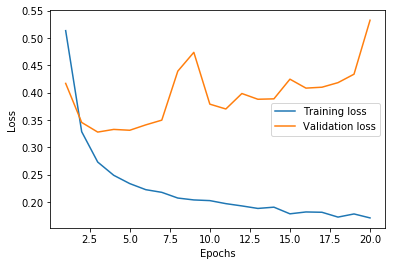

In [7]:
train_loss_history = history_dict['loss']
val_loss_history = history_dict['val_loss']
epochs = range(1, len(train_loss_history) + 1)

plt.figure()
plt.plot(epochs, train_loss_history, label='Training loss')
plt.plot(epochs, val_loss_history, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

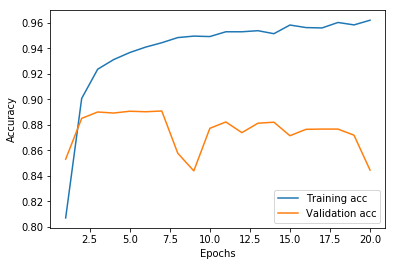

In [8]:
train_acc_history = history_dict['acc']
val_acc_history = history_dict['val_acc']
epochs = range(1, len(train_loss_history) + 1)

plt.figure()
plt.plot(epochs, train_acc_history, label='Training acc')
plt.plot(epochs, val_acc_history, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [9]:
model = build_model()
history = model.fit(np.concatenate([train_x, val_x]), np.concatenate([train_y, val_y]), 
                    epochs=4, batch_size=512, verbose=0)

In [10]:
test_loss, test_acc = model.evaluate(test_x, test_y)
print("test_loss = {}, test_acc = {}".format(test_loss, test_acc))

25000/25000 [==============================] - 2s 80us/step
test_loss = 0.3657139469432831, test_acc = 0.8736


In [11]:
sample_idx = 0
sample_data = test_data[sample_idx]
sample_x = test_x[sample_idx]
sample_y = test_y[sample_idx]

dict_word_idx = imdb.get_word_index()
dict_rev_word_idx = {idx: word for word, idx in dict_word_idx.items()}

def decode(data):
    return ' '.join(dict_rev_word_idx.get(i - 3, '?') for i in data)

predict = model.predict(sample_x.reshape(1, -1))

print("data = {}\n".format(decode(sample_data)))
print("label = {}\n".format(sample_y))
print("predict = {}".format(predict))

data = ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss

label = 0.0

predict = [[0.13621706]]
